## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# AUTHOR: NKIROTE MAWIRA
# BUSINESS UNDERSTANDING
# This data-driven analysis provides valuable insights to guide film selection, budgeting, and potential acquisitions for Microsoft's new movie studio. By leveraging these recommendations, the studio can increase its chances of producing successful and critically acclaimed movies.

# DATA UNDERSTANDING AND ANALYSIS

In [118]:
#importing data
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns



In [119]:
bom_df = pd.read_csv("DATA/bom.movie_gross.csv.gz")
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [120]:
# Connecting to the SQLite database
conn = sqlite3.connect('imdb.db')

In [121]:
bom_df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [122]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [123]:
#checking for missing vallues in the bom data frame
missing_values = bom_df.isnull()
missing_values

,title,studio,domestic_gross,foreign_gross,year
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3382,False,False,False,True,False
3383,False,False,False,True,False
3384,False,False,False,True,False
3385,False,False,False,True,False


In [124]:
missing_values.sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [125]:
# dropping null values
bom_df = bom_df.dropna(subset = ["studio"])
bom_df.isna().sum()

title                0
studio               0
domestic_gross      26
foreign_gross     1349
year                 0
dtype: int64

In [126]:
# dropping unnecessary columns
cols_to_drop = ["domestic_gross","foreign_gross","year"]
cols = [col for col in bom_df.columns if col not in cols_to_drop]
bom_df = bom_df[cols]
bom_df

,title,studio
0,Toy Story 3,BV
1,Alice in Wonderland (2010),BV
2,Harry Potter and the Deathly Hallows Part 1,WB
3,Inception,WB
4,Shrek Forever After,P/DW
...,...,...
3382,The Quake,Magn.
3383,Edward II (2018 re-release),FM
3384,El Pacto,Sony
3385,The Swan,Synergetic


# Tmdb movie data

In [127]:
# Reading the dataset
tm_movies_df = pd.read_csv('Data/tmdb.movies.csv.gz')
tm_movies_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [128]:
tm_movies_df.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [129]:
# checking for duplicates
tm_movies_df.duplicated().value_counts()

False    26517
Name: count, dtype: int64

In [130]:
tm_movies_df.loc[:,"release_date"] = pd.to_datetime(tm_movies_df["release_date"])

In [131]:
tm_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [132]:
# dropping unnecessary columns
cols_to_drop = ["id","release_date","original_title"]
cols = [col for col in tm_movies_df if col not in cols_to_drop]
tm_movies_df = tm_movies_df[cols]
tm_movies_df

,Unnamed: 0,genre_ids,original_language,popularity,title,vote_average,vote_count
0,0,"[12, 14, 10751]",en,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",en,28.734,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",en,28.515,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",en,28.005,Toy Story,7.9,10174
4,4,"[28, 878, 12]",en,27.920,Inception,8.3,22186
...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",en,0.600,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",en,0.600,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",en,0.600,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",en,0.600,Trailer Made,0.0,1


# TN Movie Budget data

In [133]:
#Reading the dataset
tn_budgets_df = pd.read_csv("DATA/tn.movie_budgets.csv.gz")
tn_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [134]:
tn_budgets_df.shape # returns (5782 ,6)

(5782, 6)

In [135]:
tn_budgets_df.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [136]:
# checking for duplicates
tn_budgets_df.duplicated().value_counts()

False    5782
Name: count, dtype: int64

In [137]:
clean_and_convert = ["production_budget","domestic_gross","worldwide_gross"]

In [138]:
tn_budgets_df["release_date"] = pd.to_datetime(tn_budgets_df["release_date"])

In [139]:
tn_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   object        
 4   domestic_gross     5782 non-null   object        
 5   worldwide_gross    5782 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 271.2+ KB


In [140]:
# dropping unnecessary columns
cols_to_drop = ["release_date", "id"]
cols =[ col for col in tn_budgets_df if col not in cols_to_drop]
tn_budgets_df = tn_budgets_df[cols]
tn_budgets_df

,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...
5777,Red 11,"$7,000",$0,$0
5778,Following,"$6,000","$48,482","$240,495"
5779,Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,A Plague So Pleasant,"$1,400",$0,$0


# Reviews dataset

In [141]:
reviews_df = pd.read_tsv('DATA/rt.reviews.tsv.gz')
reviews_df

AttributeError: module 'pandas' has no attribute 'read_tsv'

# Merging Dataframes

In [ ]:
merged_bom_df_tm_df = pd.merge(bom_df ,tm_movies_df,left_on = "title",right_on = "title",how = "inner")
merged_bom_df_tm_df

,title,studio,domestic_gross,foreign_gross,year,Unnamed: 0,genre_ids,original_language,popularity,vote_average,vote_count
0,Toy Story 3,BV,415000000.0,652000000,2010,7,"[16, 10751, 35]",en,24.445,7.7,8340
1,Inception,WB,292600000.0,535700000,2010,4,"[28, 878, 12]",en,27.920,8.3,22186
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,38,"[35, 12, 14, 16, 10751]",en,15.041,6.1,3843
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,15,"[12, 14, 18, 10749]",en,20.340,6.0,4909
4,Iron Man 2,Par.,312400000.0,311500000,2010,2,"[12, 28, 878]",en,28.515,6.8,12368
...,...,...,...,...,...,...,...,...,...,...,...
2698,The Escape,IFC,14000.0,NaN,2018,16803,"[53, 28]",en,0.600,7.0,1
2699,The Escape,IFC,14000.0,NaN,2018,19053,"[53, 28]",en,1.176,6.6,10
2700,Souvenir,Strand,11400.0,NaN,2018,18483,"[35, 18]",fr,2.130,5.8,14
2701,The Quake,Magn.,6200.0,NaN,2018,24107,[12],no,11.051,6.7,81


In [ ]:
merged_bom_df_tm_df= pd.merge(merged_bom_df_tm_df,tn_budgets_df,left_on = "title",right_on = "movie",how = "inner")
merged_bom_df_tm_df

,title,studio,domestic_gross_x,foreign_gross,year,Unnamed: 0,genre_ids,original_language,popularity,vote_average,vote_count,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,7,"[16, 10751, 35]",en,24.445,7.7,8340,Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,4,"[28, 878, 12]",en,27.920,8.3,22186,Inception,"$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,38,"[35, 12, 14, 16, 10751]",en,15.041,6.1,3843,Shrek Forever After,"$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,15,"[12, 14, 18, 10749]",en,20.340,6.0,4909,The Twilight Saga: Eclipse,"$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.0,311500000,2010,2,"[12, 28, 878]",en,28.515,6.8,12368,Iron Man 2,"$170,000,000","$312,433,331","$621,156,389"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,25148,"[28, 12, 16]",en,2.707,6.8,54,Bilal: A New Breed of Hero,"$30,000,000","$490,973","$648,599"
1391,Mandy,RLJ,1200000.0,NaN,2018,20499,[18],en,0.600,3.5,2,Mandy,"$6,000,000","$1,214,525","$1,427,656"
1392,Mandy,RLJ,1200000.0,NaN,2018,23952,"[28, 53, 27, 14, 9648]",en,16.240,6.2,618,Mandy,"$6,000,000","$1,214,525","$1,427,656"
1393,Lean on Pete,A24,1200000.0,NaN,2018,20908,"[18, 12]",en,9.307,6.9,133,Lean on Pete,"$8,000,000","$1,163,056","$2,455,027"


In [ ]:
# dropping columns
cols_to_drop = ["movie_y", "production_budget_y","worldwide_gross_y","movie_x","production_budget_x","worldwide_gross_x"]
cols =[ col for col in merged_bom_df_tm_df if col not in cols_to_drop]
merged_bom_df_tm_df = merged_bom_df_tm_df[cols]
merged_bom_df_tm_df

,title,studio,foreign_gross,year,Unnamed: 0,genre_ids,original_language,popularity,vote_average,vote_count,production_budget,worldwide_gross
0,Toy Story 3,BV,652000000,2010,7,"[16, 10751, 35]",en,24.445,7.7,8340,"$200,000,000","$1,068,879,522"
1,Inception,WB,535700000,2010,4,"[28, 878, 12]",en,27.920,8.3,22186,"$160,000,000","$835,524,642"
2,Shrek Forever After,P/DW,513900000,2010,38,"[35, 12, 14, 16, 10751]",en,15.041,6.1,3843,"$165,000,000","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,398000000,2010,15,"[12, 14, 18, 10749]",en,20.340,6.0,4909,"$68,000,000","$706,102,828"
4,Iron Man 2,Par.,311500000,2010,2,"[12, 28, 878]",en,28.515,6.8,12368,"$170,000,000","$621,156,389"
...,...,...,...,...,...,...,...,...,...,...,...,...
1388,Destroyer,Annapurna,4000000,2018,23921,"[53, 80, 18, 28]",en,17.815,5.9,176,"$9,000,000","$3,681,096"
1389,Gotti,VE,NaN,2018,24168,"[80, 18, 36, 53]",en,10.034,5.2,231,"$10,000,000","$6,089,100"
1390,Bilal: A New Breed of Hero,VE,1700000,2018,25148,"[28, 12, 16]",en,2.707,6.8,54,"$30,000,000","$648,599"
1391,Mandy,RLJ,NaN,2018,20499,[18],en,0.600,3.5,2,"$6,000,000","$1,427,656"


In [ ]:
merged_bom_df_tm_df.drop_duplicates(inplace = True)
merged_bom_df_tm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1395 entries, 0 to 1394
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1395 non-null   object 
 1   studio             1394 non-null   object 
 2   foreign_gross      1200 non-null   object 
 3   year               1395 non-null   int64  
 4   Unnamed: 0         1395 non-null   int64  
 5   genre_ids          1395 non-null   object 
 6   original_language  1395 non-null   object 
 7   popularity         1395 non-null   float64
 8   vote_average       1395 non-null   float64
 9   vote_count         1395 non-null   int64  
 10  movie              1395 non-null   object 
 11  production_budget  1395 non-null   object 
 12  worldwide_gross    1395 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 141.8+ KB


C:\Users\user\AppData\Local\Temp\ipykernel_18772\2015685532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_bom_df_tm_df.drop_duplicates(inplace = True)


In [ ]:
# dropping duplicates in title
merged_bom_df_tm_df = merged_bom_df_tm_df.drop_duplicates(subset = ["title"])
merged_bom_df_tm_df.shape  # returns (1170 ,12)

(1170, 12)

In [ ]:
merged_bom_df_tm_df.info

<bound method DataFrame.info of                            title     studio foreign_gross  year  Unnamed: 0  \
0                    Toy Story 3         BV     652000000  2010           7   
1                      Inception         WB     535700000  2010           4   
2            Shrek Forever After       P/DW     513900000  2010          38   
3     The Twilight Saga: Eclipse       Sum.     398000000  2010          15   
4                     Iron Man 2       Par.     311500000  2010           2   
...                          ...        ...           ...   ...         ...   
1388                   Destroyer  Annapurna       4000000  2018       23921   
1389                       Gotti         VE           NaN  2018       24168   
1390  Bilal: A New Breed of Hero         VE       1700000  2018       25148   
1391                       Mandy        RLJ           NaN  2018       20499   
1393                Lean on Pete        A24           NaN  2018       20908   

                   

In [ ]:
merged_bom_df_tm_df.describe()

,year,Unnamed: 0,popularity,vote_average,vote_count
count,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000
mean,2013.626496,10027.033333,13.172488,6.361966,2247.975214
std,2.520027,7440.955296,7.871624,0.848093,2896.942271
min,2010.000000,1.000000,0.600000,1.000000,1.000000
25%,2011.000000,2739.750000,8.517750,5.900000,429.500000
50%,2014.000000,8116.500000,11.364500,6.400000,1183.000000
75%,2016.000000,17391.750000,15.885750,6.900000,2870.000000
max,2018.000000,25148.000000,80.773000,10.000000,22186.000000


# FRANCHISE SUCCESS

In [ ]:
# creating a copy of original dataframe
franchise_success = merged_bom_df_tm_df.copy()
franchise_success

,title,studio,foreign_gross,year,Unnamed: 0,genre_ids,original_language,popularity,vote_average,vote_count,production_budget,worldwide_gross
0,Toy Story 3,BV,652000000,2010,7,"[16, 10751, 35]",en,24.445,7.7,8340,"$200,000,000","$1,068,879,522"
1,Inception,WB,535700000,2010,4,"[28, 878, 12]",en,27.920,8.3,22186,"$160,000,000","$835,524,642"
2,Shrek Forever After,P/DW,513900000,2010,38,"[35, 12, 14, 16, 10751]",en,15.041,6.1,3843,"$165,000,000","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,398000000,2010,15,"[12, 14, 18, 10749]",en,20.340,6.0,4909,"$68,000,000","$706,102,828"
4,Iron Man 2,Par.,311500000,2010,2,"[12, 28, 878]",en,28.515,6.8,12368,"$170,000,000","$621,156,389"
...,...,...,...,...,...,...,...,...,...,...,...,...
1388,Destroyer,Annapurna,4000000,2018,23921,"[53, 80, 18, 28]",en,17.815,5.9,176,"$9,000,000","$3,681,096"
1389,Gotti,VE,NaN,2018,24168,"[80, 18, 36, 53]",en,10.034,5.2,231,"$10,000,000","$6,089,100"
1390,Bilal: A New Breed of Hero,VE,1700000,2018,25148,"[28, 12, 16]",en,2.707,6.8,54,"$30,000,000","$648,599"
1391,Mandy,RLJ,NaN,2018,20499,[18],en,0.600,3.5,2,"$6,000,000","$1,427,656"


In [ ]:
def categorize_franchise(title):
    franchise_keywords = ['sequel', 'franchise', 'part', '2', '3' ,'I','II','III','returns' ,':','awakens','remake','rises','chronicles','saga','revenge','forever_frafter','origin','beginning','last','final'] 
    for keyword in franchise_keywords:
        if keyword in title.lower():
            return 'Franchise'
    return 'Standalone'

franchise_success['franchise'] = franchise_success['title'].apply(categorize_franchise)
franchise_success

,title,studio,foreign_gross,year,Unnamed: 0,genre_ids,original_language,popularity,vote_average,vote_count,production_budget,worldwide_gross,franchise
0,Toy Story 3,BV,652000000,2010,7,"[16, 10751, 35]",en,24.445,7.7,8340,"$200,000,000","$1,068,879,522",Franchise
1,Inception,WB,535700000,2010,4,"[28, 878, 12]",en,27.920,8.3,22186,"$160,000,000","$835,524,642",Standalone
2,Shrek Forever After,P/DW,513900000,2010,38,"[35, 12, 14, 16, 10751]",en,15.041,6.1,3843,"$165,000,000","$756,244,673",Standalone
3,The Twilight Saga: Eclipse,Sum.,398000000,2010,15,"[12, 14, 18, 10749]",en,20.340,6.0,4909,"$68,000,000","$706,102,828",Franchise
4,Iron Man 2,Par.,311500000,2010,2,"[12, 28, 878]",en,28.515,6.8,12368,"$170,000,000","$621,156,389",Franchise
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,Destroyer,Annapurna,4000000,2018,23921,"[53, 80, 18, 28]",en,17.815,5.9,176,"$9,000,000","$3,681,096",Standalone
1389,Gotti,VE,NaN,2018,24168,"[80, 18, 36, 53]",en,10.034,5.2,231,"$10,000,000","$6,089,100",Standalone
1390,Bilal: A New Breed of Hero,VE,1700000,2018,25148,"[28, 12, 16]",en,2.707,6.8,54,"$30,000,000","$648,599",Franchise
1391,Mandy,RLJ,NaN,2018,20499,[18],en,0.600,3.5,2,"$6,000,000","$1,427,656",Standalone


In [143]:
franchise_success[['title', 'franchise', 'worldwide_gross']]

,title,franchise,worldwide_gross
0,Toy Story 3,Franchise,"$1,068,879,522"
1,Inception,Standalone,"$835,524,642"
2,Shrek Forever After,Standalone,"$756,244,673"
3,The Twilight Saga: Eclipse,Franchise,"$706,102,828"
4,Iron Man 2,Franchise,"$621,156,389"
...,...,...,...
1388,Destroyer,Standalone,"$3,681,096"
1389,Gotti,Standalone,"$6,089,100"
1390,Bilal: A New Breed of Hero,Franchise,"$648,599"
1391,Mandy,Standalone,"$1,427,656"


In [144]:
# replacing currency and commas in worldwide gross 
franchise_success['worldwide_gross'] = franchise_success['worldwide_gross'].replace('$', '').replace(',', '')
franchise_success

,title,studio,foreign_gross,year,Unnamed: 0,genre_ids,original_language,popularity,vote_average,vote_count,production_budget,worldwide_gross,franchise
0,Toy Story 3,BV,652000000,2010,7,"[16, 10751, 35]",en,24.445,7.7,8340,"$200,000,000","$1,068,879,522",Franchise
1,Inception,WB,535700000,2010,4,"[28, 878, 12]",en,27.920,8.3,22186,"$160,000,000","$835,524,642",Standalone
2,Shrek Forever After,P/DW,513900000,2010,38,"[35, 12, 14, 16, 10751]",en,15.041,6.1,3843,"$165,000,000","$756,244,673",Standalone
3,The Twilight Saga: Eclipse,Sum.,398000000,2010,15,"[12, 14, 18, 10749]",en,20.340,6.0,4909,"$68,000,000","$706,102,828",Franchise
4,Iron Man 2,Par.,311500000,2010,2,"[12, 28, 878]",en,28.515,6.8,12368,"$170,000,000","$621,156,389",Franchise
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,Destroyer,Annapurna,4000000,2018,23921,"[53, 80, 18, 28]",en,17.815,5.9,176,"$9,000,000","$3,681,096",Standalone
1389,Gotti,VE,NaN,2018,24168,"[80, 18, 36, 53]",en,10.034,5.2,231,"$10,000,000","$6,089,100",Standalone
1390,Bilal: A New Breed of Hero,VE,1700000,2018,25148,"[28, 12, 16]",en,2.707,6.8,54,"$30,000,000","$648,599",Franchise
1391,Mandy,RLJ,NaN,2018,20499,[18],en,0.600,3.5,2,"$6,000,000","$1,427,656",Standalone


# Identifying the most common language

In [146]:
# creating a copy of original dataframe
popl_language = merged_bom_df_tm_df.copy()
popl_language.head()

,title,studio,foreign_gross,year,Unnamed: 0,genre_ids,original_language,popularity,vote_average,vote_count,production_budget,worldwide_gross
0,Toy Story 3,BV,652000000,2010,7,"[16, 10751, 35]",en,24.445,7.7,8340,"$200,000,000","$1,068,879,522"
1,Inception,WB,535700000,2010,4,"[28, 878, 12]",en,27.920,8.3,22186,"$160,000,000","$835,524,642"
2,Shrek Forever After,P/DW,513900000,2010,38,"[35, 12, 14, 16, 10751]",en,15.041,6.1,3843,"$165,000,000","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,398000000,2010,15,"[12, 14, 18, 10749]",en,20.340,6.0,4909,"$68,000,000","$706,102,828"
4,Iron Man 2,Par.,311500000,2010,2,"[12, 28, 878]",en,28.515,6.8,12368,"$170,000,000","$621,156,389"


In [147]:
language_counts = merged_bom_df_tm_df['original_language'].value_counts()
language_counts

original_language
en    1137
fr       7
hi       7
es       3
ko       3
tr       1
ar       1
de       1
ru       1
te       1
xx       1
hu       1
he       1
pl       1
th       1
fa       1
da       1
el       1
Name: count, dtype: int64

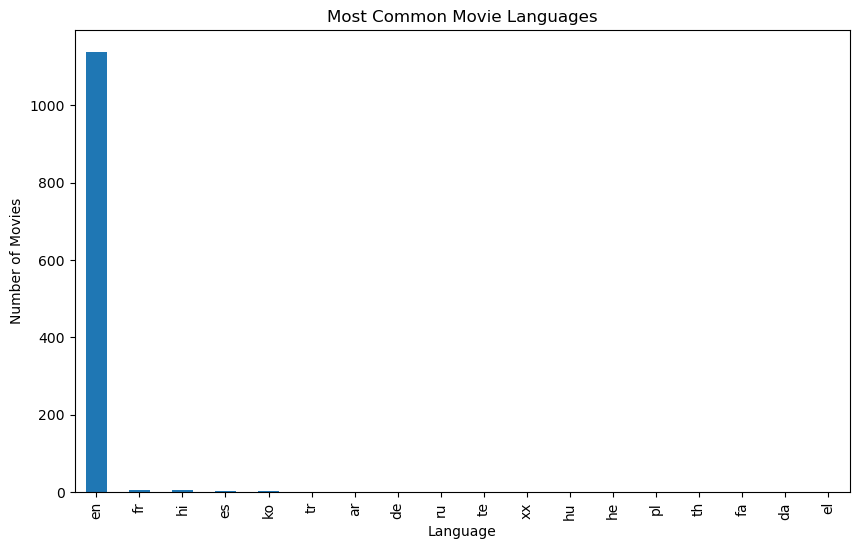

In [148]:
# plotting a bar chart
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar')

plt.title('Most Common Movie Languages')
plt.xlabel('Language')
plt.ylabel('Number of Movies')

plt.show()

The above graph sows the language that is commonly used it films across the chart. The chart illustrates the distribution of movies across various languages.
English, represented by the tallest bar, is by far the most common language in which movies are produced.

In [149]:
# creating a copy of original dataframe
budget_df = franchise_success.copy()
budget_df

,title,studio,foreign_gross,year,Unnamed: 0,genre_ids,original_language,popularity,vote_average,vote_count,production_budget,worldwide_gross,franchise
0,Toy Story 3,BV,652000000,2010,7,"[16, 10751, 35]",en,24.445,7.7,8340,"$200,000,000","$1,068,879,522",Franchise
1,Inception,WB,535700000,2010,4,"[28, 878, 12]",en,27.920,8.3,22186,"$160,000,000","$835,524,642",Standalone
2,Shrek Forever After,P/DW,513900000,2010,38,"[35, 12, 14, 16, 10751]",en,15.041,6.1,3843,"$165,000,000","$756,244,673",Standalone
3,The Twilight Saga: Eclipse,Sum.,398000000,2010,15,"[12, 14, 18, 10749]",en,20.340,6.0,4909,"$68,000,000","$706,102,828",Franchise
4,Iron Man 2,Par.,311500000,2010,2,"[12, 28, 878]",en,28.515,6.8,12368,"$170,000,000","$621,156,389",Franchise
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,Destroyer,Annapurna,4000000,2018,23921,"[53, 80, 18, 28]",en,17.815,5.9,176,"$9,000,000","$3,681,096",Standalone
1389,Gotti,VE,NaN,2018,24168,"[80, 18, 36, 53]",en,10.034,5.2,231,"$10,000,000","$6,089,100",Standalone
1390,Bilal: A New Breed of Hero,VE,1700000,2018,25148,"[28, 12, 16]",en,2.707,6.8,54,"$30,000,000","$648,599",Franchise
1391,Mandy,RLJ,NaN,2018,20499,[18],en,0.600,3.5,2,"$6,000,000","$1,427,656",Standalone


In [151]:
# Specifying the list of column names to select
new_columns = ['production_budget',  'worldwide_gross']

# Creating a new DataFrame with only the selected columns
new_budget_df = budget_df[new_columns]
new_budget_df.head()

,production_budget,worldwide_gross
0,"$200,000,000","$1,068,879,522"
1,"$160,000,000","$835,524,642"
2,"$165,000,000","$756,244,673"
3,"$68,000,000","$706,102,828"
4,"$170,000,000","$621,156,389"


In [152]:
new_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1170 entries, 0 to 1393
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   production_budget  1170 non-null   object
 1   worldwide_gross    1170 non-null   object
dtypes: object(2)
memory usage: 27.4+ KB


In [153]:
new_budget_df['production_budget'] = new_budget_df['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
new_budget_df

C:\Users\user\AppData\Local\Temp\ipykernel_18772\4035561289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_budget_df['production_budget'] = new_budget_df['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)


,production_budget,worldwide_gross
0,200000000.0,"$1,068,879,522"
1,160000000.0,"$835,524,642"
2,165000000.0,"$756,244,673"
3,68000000.0,"$706,102,828"
4,170000000.0,"$621,156,389"
...,...,...
1388,9000000.0,"$3,681,096"
1389,10000000.0,"$6,089,100"
1390,30000000.0,"$648,599"
1391,6000000.0,"$1,427,656"


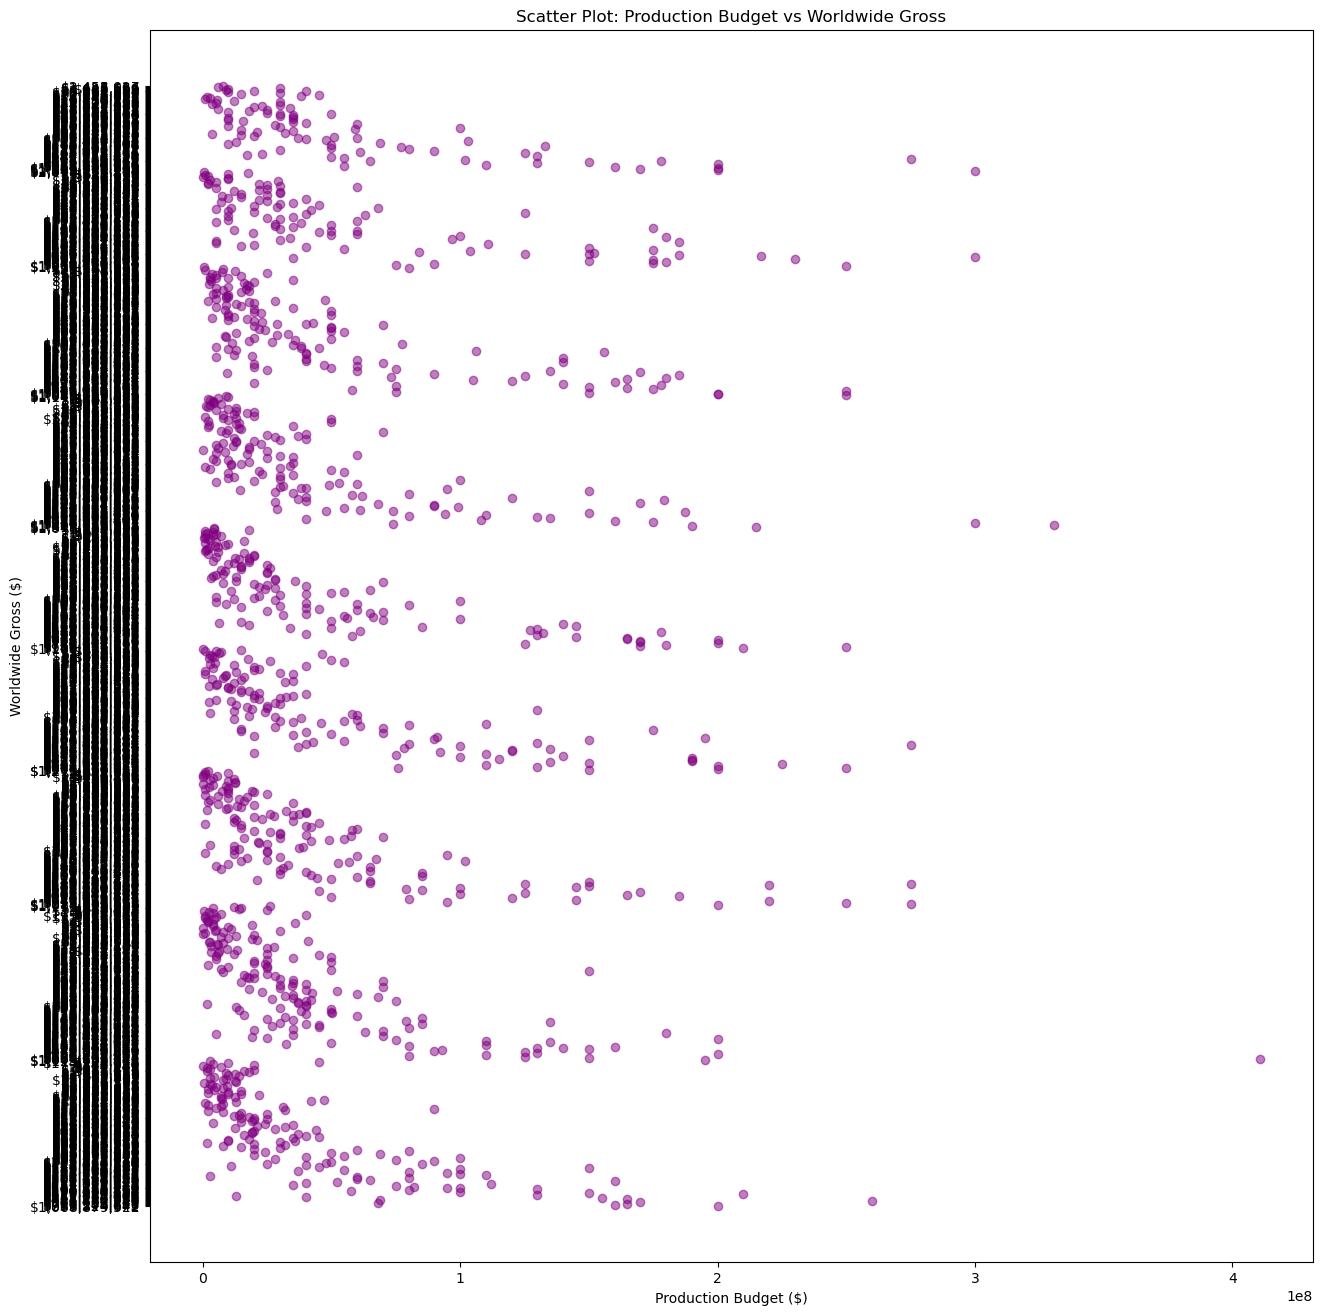

In [159]:
# Creating a scatter plot for 'Production Budget' vs 'Worldwide Gross'
plt.figure(figsize=(10,6))
plt.scatter(new_budget_df['production_budget'], new_budget_df['worldwide_gross'], alpha=0.5, color='purple')
plt.title('Scatter Plot: Production Budget vs Worldwide Gross')

plt.xlabel('Production Budget ($)')
plt.ylabel('Worldwide Gross ($)')

plt.show()